### ĐỒ ÁN CUỐI KÌ LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU **LÝ THUYẾT**

### Khám phá dữ liệu
#### Đọc dữ liệu từ file csv

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json 

In [4]:
df_results = pd.read_csv('./[2018-2021] thptqg-data/2017-2021.csv')
df_results.head()

,SBD,Toan,Van,Ly,Sinh,Ngoai ngu,Year,Hoa,Lich su,Dia ly,GDCD,MaTinh
0,8002816,7.8,8.25,7.50,7.0,6.2,2017,NaN,NaN,NaN,NaN,8
1,8005707,3.0,3.25,2.75,3.0,3.2,2017,NaN,NaN,NaN,NaN,8
2,8004883,6.0,5.25,NaN,NaN,4.8,2017,NaN,NaN,NaN,NaN,8
3,8004786,2.4,3.75,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,8
4,8004225,4.2,4.00,NaN,NaN,3.0,2017,NaN,NaN,NaN,NaN,8


#### Ở đây chúng ta có được file exel có dữ liệu của năm 2017
Tuy nhiên <span style="color:red">**KHÔNG** thể sử dụng được</span>  vì dữ liệu của năm này đã thiếu mất một số cột điểm quy định
**Vậy nên** hiện tại chúng ta sẽ làm việc trên tập dữ liệu 2018-2021

In [5]:
df_results = df_results[df_results['Year']!=2017]

In [6]:
df_cities = pd.read_csv('./[2018-2021] thptqg-data/Tinh.csv')
df_cities.head()

,MaTinh,TenTinh
0,1,THÀNH PHỐ HÀ NỘI
1,2,THÀNH PHỐ HỒ CHÍ MINH
2,3,THÀNH PHỐ HẢI PHÒNG
3,4,THÀNH PHỐ ĐÀ NẴNG
4,5,TỈNH HÀ GIANG


#### Kiểm tra dòng trùng

In [7]:
have_duplicated_rows = False
for i in df_results.duplicated().items():
    if(i == True):
        have_duplicated_rows = True

if(have_duplicated_rows == True):
    print('Bị trùng dữ liệu')
else:
    print('Không bị trùng')

Không bị trùng


#### Số dòng và cột của dữ liệu

In [8]:
num_result_rows = len(df_results.axes[0])
num_result_cols = len(df_results.axes[1])

num_city_rows = len(df_cities.axes[0])
num_city_cols = len(df_cities.axes[1])

In [9]:
print('Có tổng cộng là {number} học sinh tham gia kì thi THPTQG trên khắp cả nước'.format(number=num_result_rows))
print('Số lượng các tỉnh tham gia là {number} tỉnh'.format(number=num_city_rows))

Có tổng cộng là 3351840 học sinh tham gia kì thi THPTQG trên khắp cả nước
Số lượng các tỉnh tham gia là 63 tỉnh


In [10]:
for i in df_results.columns:
    print(i, end = ", ")

SBD, Toan, Van, Ly, Sinh, Ngoai ngu, Year, Hoa, Lich su, Dia ly, GDCD, MaTinh, 

#### Ý nghĩa của từng cột


|Tên cột   |Ý nghĩa   |
|---|---|
|SBD  |Số báo danh của thí sinh (có thể bị trùng ở các năm khác nhau), trong 1 năm không tồn tại 2 SBD giống nha   |
|Toan   |Điểm môn Toán  |
|Van   |Điểm môn Ngữ văn   |
|Ngoai ngu   |Điểm môn Ngoại ngữ  (Có thể là Tiếng Anh, Tiếng Nhật, Tiếng Trung ,...) |
|Ly   |Điểm môn Vật lý   |
|Hoa   |Điểm môn Hóa học   |
|Sinh   |Điểm môn Sinh học   |
|Lich su   |Điểm môn Sử   |
|Dia ly   |Điểm môn Dịa   |
|GDCD   |Điểm môn Giáo dục công dân   |
|MaTinh   |Mã tỉnh dự thi   |




## Tiền xử lí dữ liệu

##### Xử lí các cột có trật tự logic xác định

In [11]:
new_order = ['SBD', 'Toan', 'Van' ,'Ngoai ngu', 'Ly', 'Sinh', 'Hoa', 'Lich su', 'Dia ly', 'GDCD', 'Year','MaTinh']
df_results = df_results[new_order]

## Đặt câu hỏi và trả lời

**Câu 1:**
Tìm số lượng thí sinh tham dự của các tỉnh vào mỗi năm

In [12]:
years = df_results['Year'].unique()
cities = df_cities['MaTinh'].unique()

**Lưu ý:** Tồn tại những năm có những tỉnh không được ghi nhận số liệu, điều này là do mất số liệu lưu trữ trong năm đó

In [13]:
for year in years:
    col_year_city_participants_number =[]
    for city in cities:
        col_year_city_participants_number.append(df_results.loc[(df_results['Year']==year) & (df_results['MaTinh']==city),'SBD'].count())
    df_cities[year] =  pd.Series(col_year_city_participants_number)

df_cities

,MaTinh,TenTinh,2018,2019,2020,2021
0,1,THÀNH PHỐ HÀ NỘI,38099,74277,78860,100838
1,2,THÀNH PHỐ HỒ CHÍ MINH,78321,0,74451,86367
2,3,THÀNH PHỐ HẢI PHÒNG,5099,18484,18533,23269
3,4,THÀNH PHỐ ĐÀ NẴNG,6099,10110,0,12637
4,5,TỈNH HÀ GIANG,3099,5155,5627,5618
...,...,...,...,...,...,...
58,60,TỈNH BẠC LIÊU,5370,5355,5589,6340
59,61,TỈNH CÀ MAU,9275,9292,9637,10925
60,62,TỈNH ĐIỆN BIÊN,5481,5287,5608,6276
61,63,TỈNH ĐĂK NÔNG,6361,6292,6212,6685


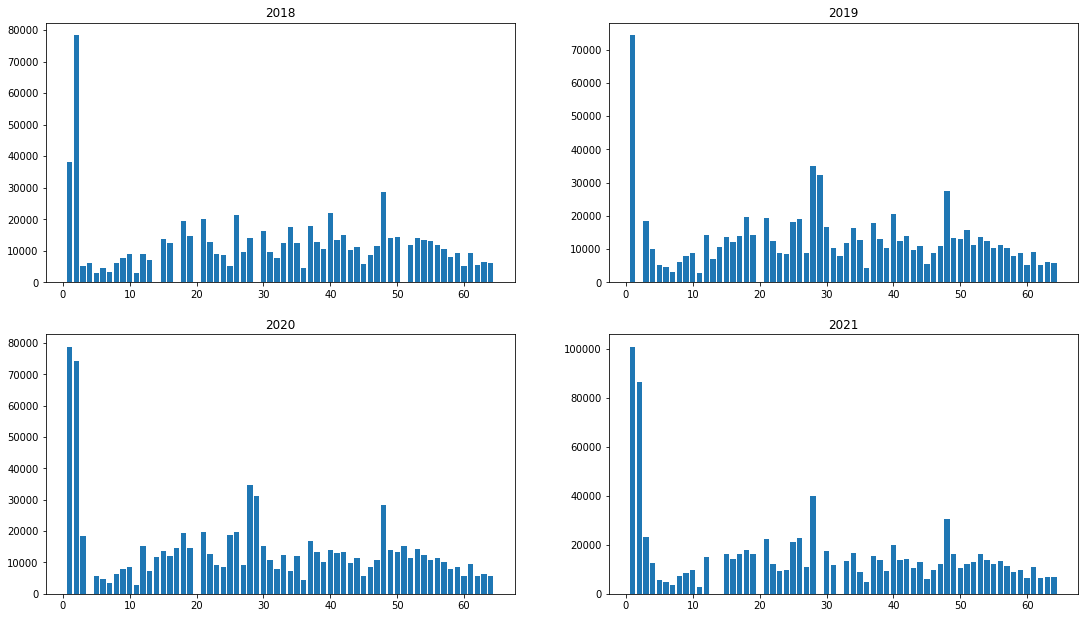

In [14]:
from matplotlib.pyplot import figure

fig,a =  plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5, forward=True)
x = np.array(df_cities['MaTinh'])

x = np.arange(1,5)
a[0][0].bar(np.array(df_cities['MaTinh']),np.array(df_cities[2018]))
a[0][0].set_title('2018')
a[0][1].bar(np.array(df_cities['MaTinh']),np.array(df_cities[2019]))
a[0][1].set_title('2019')
a[1][0].bar(np.array(df_cities['MaTinh']),np.array(df_cities[2020]))
a[1][0].set_title('2020')
a[1][1].bar(np.array(df_cities['MaTinh']),np.array(df_cities[2021]))
a[1][1].set_title('2021')
plt.show()

### <span style="color:red">**Lưu ý**</span>
Những thành phố có năm không thu thập được dữ liệu

In [46]:
df_cities[(df_cities[2018]==0) | (df_cities[2019]==0) | (df_cities[2020]==0) |(df_cities[2021]==0)]

,MaTinh,TenTinh,2018,2019,2020,2021
1,2,THÀNH PHỐ HỒ CHÍ MINH,78321,0,74451,86367
3,4,THÀNH PHỐ ĐÀ NẴNG,6099,10110,0,12637
12,13,TỈNH YÊN BÁI,7022,7024,7404,0
13,14,TỈNH SƠN LA,0,10551,11626,0
16,17,TỈNH QUẢNG NINH,0,14108,14547,16393
27,29,TỈNH NGHỆ AN,0,32242,31072,0
30,32,TỈNH QUẢNG TRỊ,7889,7873,7897,0
49,51,TỈNH AN GIANG,0,15784,15239,12120


# Cào dữ liệu những ô thiếu - chưa làm xong

In [ ]:
# https://diemthi.vnanet.vn/BTT-tra-cuu-diem-thi-THPT-2019
# https://diemthi.vnanet.vn/Home/SearchBySobaodanhFile?code=02070045&nam=2019
# HCM :  [02000001, 02071045]

In [204]:
# obj = pd.DataFrame()
def get_result_item(result):
    obj = {
        'SBD':result['Code'],
        'Toan': result['Toan'],
        'Van': result['NguVan'],
        'Ngoai ngu': result['NgoaiNgu'],
        'Sinh': result['SinhHoc'],
        'Hoa': result['HoaHoc'],
        'Ly': result['VatLi'],
        'Dia ly': result['DiaLi'],
        'Lich su': result['LichSu'],
        'GDCD': result['GDCD']
    },
    return pd.DataFrame(obj)

In [174]:
res = requests.get('https://diemthi.vnanet.vn/Home/SearchBySobaodanhFile?code={:02d}{:06d}&nam={year}'.format(2, 74132,year=2019))
response = json.loads(res.text)
result = response['result']
response

{'message': 'Số báo danh không đúng. Bạn vui lòng nhập lại.', 'result': []}

In [205]:
df_new = pd.DataFrame()

for year in [2019]:
    for i in [2]:
    # for i in df_cities['MaTinh']:
        ms = 69990
        enable = True
        while enable ==True:
            res = requests.get('https://diemthi.vnanet.vn/Home/SearchBySobaodanhFile?code={:02d}{:06d}&nam={year}'.format(i, ms,year=year))
            response = json.loads(res.text)
            result = response['result']
            if (len(result)==0):
                enable=False
            else:
                # df_new = df_new.append(append_df_ressult(result[0]),ignore_index = True)
                df_new = pd.concat([df_new,get_result_item(result[0])],ignore_index = True)
                ms+=1

df_new

,SBD,Toan,Van,Ngoai ngu,Sinh,Hoa,Ly,Dia ly,Lich su,GDCD
0,02069990,4.80,6.00,4.60,,,,6.50,3.25,8.50
1,02069991,7.20,5.75,5.60,4.75,8.00,5.75,,,
2,02069992,7.40,5.00,4.20,3.50,7.00,7.25,,,
3,02069993,6.20,5.00,5.00,5.50,4.75,6.00,,,
4,02069994,6.80,5.25,,,,,8.00,6.00,
5,02069995,3.80,5.50,,,,,4.50,3.50,
6,02069996,5.20,5.75,4.20,,,,6.00,3.75,8.75
7,02069997,7.60,7.00,,5.00,8.00,7.75,,,
8,02069998,6.60,5.75,4.00,5.25,5.75,7.00,,,
9,02069999,6.20,5.00,5.20,3.50,3.00,5.75,,,


In [187]:
df_new.head(10)

""


Tính trung bình số lượng thí sinh tham gia của mỗi tỉnh\
Cho biết tình thành nào có số lượng thí sinh tham giao cao nhất / thấp nhất

In [16]:
# vì có những số liệu của các tp bị bỏ lỡ nên hiện tại sẽ sử dụng tới hàm mean tự định nghĩa
# cho phép những ô bị mất dữ liệu không tính vào tổng số tránh làm chênh lệnh
import math
def custom_mean_function(arr):
    arr = np.array(arr)
    sum = 0
    for i in arr:
        sum+=i
    return sum/len(arr[arr!=0])


In [17]:
avg_number_participants = []
len(df_cities)
for i in range(len(df_cities)):
    avg_number_participants.append(custom_mean_function(df_cities.loc[i,[2018,2018,2020,2021]]))

In [18]:
max_avg = max(avg_number_participants)
min_avg = min(avg_number_participants)

#### Tỉnh thành có nhiều thí sinh trung bình dự thi nhất là:

In [19]:
df_cities.iloc[[avg_number_participants.index(max_avg)]]

,MaTinh,TenTinh,2018,2019,2020,2021
1,2,THÀNH PHỐ HỒ CHÍ MINH,78321,0,74451,86367


#### Tỉnh thành có ít thí sinh trung bình dự thi ít nhất là:

In [20]:
df_cities.iloc[[avg_number_participants.index(min_avg)]]

,MaTinh,TenTinh,2018,2019,2020,2021
10,11,TỈNH BẮC KẠN,2866,2849,2851,2898


**Câu hỏi 3:**
Tìm và nhận xét số lượng thí sinh thi đậu tốt nghiệp\
Biết là để thõa điều kiện tốt nghiệp:
- Các môn tiên quyết bắt buộc và các môn thành phần trong bài thi Tổ hợp luôn phải lớn hơn 1.0
- Tổng điểm xét tốt nghiệp phải lớn hơn 5.0 -> ở trường hợp này mình không xét tới vì điểm tốt nghiệp có 30% là điểm trung bình trong trường

In [21]:
passed_cdt_1 = (df_results['Toan']>1 )&(df_results['Van']>1 )&(df_results['Ngoai ngu']>1 )
passed_cdt_2 = (df_results['Ly']>1 )&(df_results['Hoa']>1 )&(df_results['Sinh']>1 )
passed_cdt_3 = (df_results['Lich su']>1) & (df_results['Dia ly']>1 ) & (df_results['GDCD']>1 )


In [22]:
df_passed = df_results[passed_cdt_1 & (passed_cdt_2 | passed_cdt_3)]
df_passed

,SBD,Toan,Van,Ngoai ngu,Ly,Sinh,Hoa,Lich su,Dia ly,GDCD,Year,MaTinh
847348,18010226,3.0,3.75,3.0,NaN,NaN,NaN,3.00,6.50,8.25,2018,18
847349,18010229,8.8,7.50,9.0,NaN,NaN,NaN,6.00,9.00,8.25,2018,18
847350,18010232,6.0,5.50,4.0,5.75,5.00,5.50,NaN,NaN,NaN,2018,18
847351,18010242,3.4,5.75,2.6,NaN,NaN,NaN,3.50,4.75,7.25,2018,18
847352,18010247,3.8,6.75,3.0,NaN,NaN,NaN,3.50,6.25,8.00,2018,18
...,...,...,...,...,...,...,...,...,...,...,...,...
4199179,64006815,4.6,7.50,2.4,NaN,NaN,NaN,3.75,4.75,6.75,2021,64
4199180,64006826,7.4,6.75,9.2,NaN,NaN,NaN,5.50,6.75,9.25,2021,64
4199182,64006830,7.2,7.75,7.8,NaN,NaN,NaN,7.75,8.50,8.50,2021,64
4199184,64006813,7.6,6.50,5.4,7.25,8.25,7.75,NaN,NaN,NaN,2021,64


In [23]:
df_city_passed = pd.DataFrame()
df_city_passed['MaTinh'] = df_cities['MaTinh']

for year in years:
    city_passed_year =[]
    for city in cities:
        city_passed_year.append(df_passed.loc[(df_passed['Year']==year) & (df_passed['MaTinh']==city),'SBD'].count())
    df_city_passed[year] =  pd.Series(city_passed_year)

df_city_passed

,MaTinh,2018,2019,2020,2021
0,1,33216,64034,66582,85557
1,2,67267,0,64848,74744
2,3,4747,16640,16563,20547
3,4,5656,9012,0,11103
4,5,2799,4457,4847,4929
...,...,...,...,...,...
58,60,4896,4903,5048,5702
59,61,8467,8849,9128,10546
60,62,4376,4598,4692,5252
61,63,5736,5812,5719,6246


#### Biểu đồ cột cho thấy mối quan hệ của việc đậu và tham gia kì thi trong năm 2018

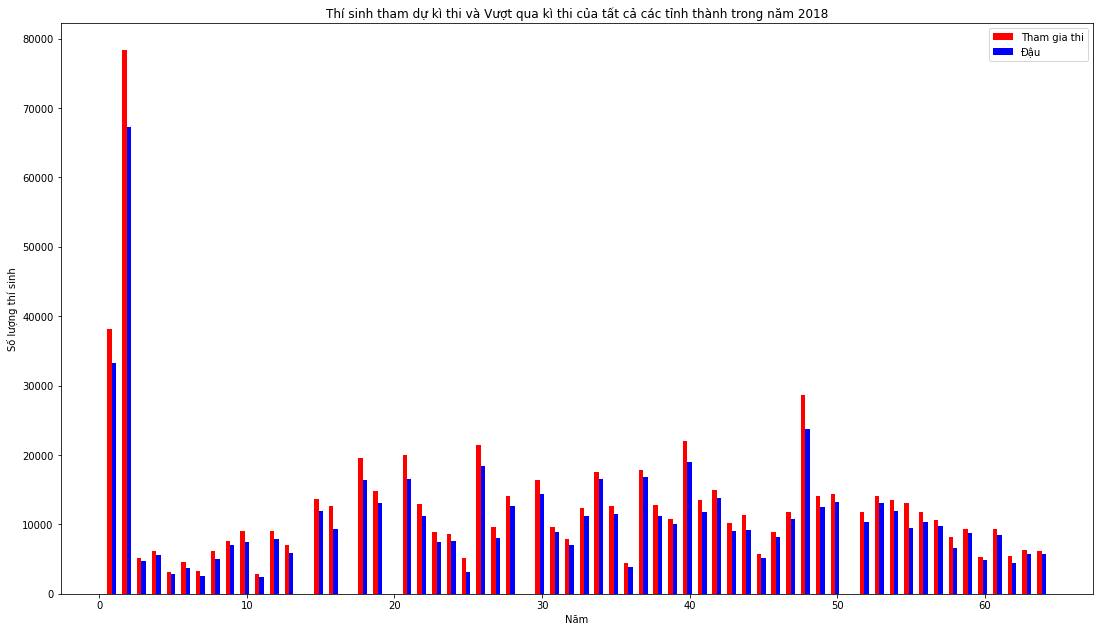

In [24]:
fig,a =  plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5, forward=True)
x = np.array(df_cities['MaTinh'])


a.bar(np.array(df_cities['MaTinh'])-0.3, df_cities[2018],color='red', width=0.3, label='Tham gia thi')
a.bar(np.array(df_cities['MaTinh']), df_city_passed[2018], width=0.3,color='blue', label='Đậu')

a.set_ylabel('Số lượng thí sinh')
a.set_xlabel('Năm')
a.set_title("Thí sinh tham dự kì thi và Vượt qua kì thi của tất cả các tỉnh thành trong năm 2018")
a.legend()

### Tỉ Lệ thi đậu tốt nghiệp

In [25]:
df_cities

,MaTinh,TenTinh,2018,2019,2020,2021
0,1,THÀNH PHỐ HÀ NỘI,38099,74277,78860,100838
1,2,THÀNH PHỐ HỒ CHÍ MINH,78321,0,74451,86367
2,3,THÀNH PHỐ HẢI PHÒNG,5099,18484,18533,23269
3,4,THÀNH PHỐ ĐÀ NẴNG,6099,10110,0,12637
4,5,TỈNH HÀ GIANG,3099,5155,5627,5618
...,...,...,...,...,...,...
58,60,TỈNH BẠC LIÊU,5370,5355,5589,6340
59,61,TỈNH CÀ MAU,9275,9292,9637,10925
60,62,TỈNH ĐIỆN BIÊN,5481,5287,5608,6276
61,63,TỈNH ĐĂK NÔNG,6361,6292,6212,6685


In [26]:
df_city_passed.loc[5,[2018]]
df_city_passed.loc[5,[2018]]
df_cities.loc[5,[2018]]!=0

2018    True
Name: 5, dtype: bool

In [27]:
percentage_passed_city = []
year = 2018
for i in range(len(df_cities)):
    percent = math.nan
    if(df_cities.loc[i,[year]].iloc[0] !=0 ):
        percent = df_city_passed.loc[i,year] *1.0 / df_cities.loc[i,year]
    percentage_passed_city.append(percent)

#### Tình thành có tỉ lệ thí sinh đỗ cao nhất và thấp nhất năm 2018 là

In [28]:
max_ratio=max(percentage_passed_city)
min_ratio=min(percentage_passed_city)

In [29]:
# CAO NHẤT
print('Tỉ lệ: ', round(max_ratio*100,2), '%')
print(df_cities.iloc[percentage_passed_city.index(max_ratio)].loc[['TenTinh']])

Tỉ lệ:  94.66 %
TenTinh    TỈNH QUẢNG NAM
Name: 32, dtype: object


In [30]:
# CAO NHẤT
print('Tỉ lệ: ', round(min_ratio*100,2),'%')
print(df_cities.iloc[percentage_passed_city.index(min_ratio)].loc[['TenTinh']])

Tỉ lệ:  61.44 %
TenTinh    TỈNH NAM ĐỊNH
Name: 23, dtype: object


**Câu hỏi 4:** \
Cho biết điểm thi môn Toán trên khắp cả nước
Trực quan hóa sự thay đổi điểm số trung bình của tất cả các môn thi

In [31]:
math_18 = df_results[df_results['Year']==2018].loc[:,'Toan']
math_19 = df_results[df_results['Year']==2019].loc[:,'Toan']
math_20 = df_results[df_results['Year']==2020].loc[:,'Toan']
math_21 = df_results[df_results['Year']==2021].loc[:,'Toan']

In [32]:
language_18 = df_results[df_results['Year']==2018].loc[:, 'Ngoai ngu']
language_19 = df_results[df_results['Year']==2019].loc[:, 'Ngoai ngu']
language_20 = df_results[df_results['Year']==2020].loc[:, 'Ngoai ngu']
language_21 = df_results[df_results['Year']==2021].loc[:, 'Ngoai ngu']

#### Trực quan hóa để thấy sự tương quan của tất cả các môn qua các năm

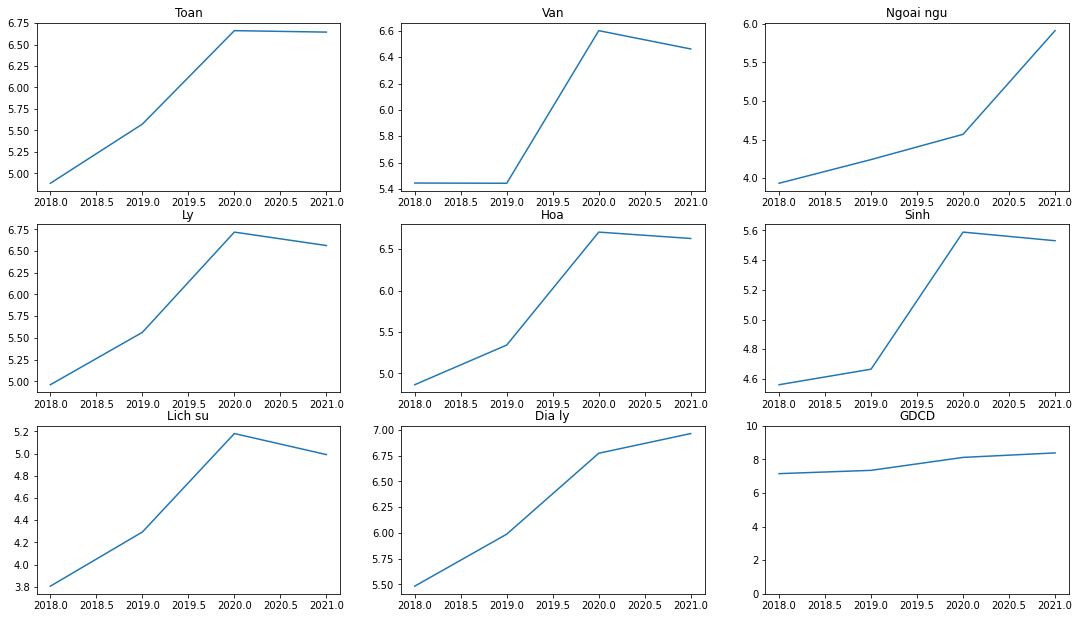

In [33]:
fig,a =  plt.subplots(3,3)
fig.set_size_inches(18.5, 10.5, forward=True)
x = np.array([2018,2019,2020,2021])

all_subjects =[ 'Toan', 'Van', 'Ngoai ngu', 'Ly',  'Hoa','Sinh', 'Lich su','Dia ly', 'GDCD']
i=0
for subject in all_subjects:
       mean_years = []
       for year in years:
              mean_years.append(np.mean(df_results[df_results['Year']==year][subject]))

       a[int(i/3)][i%3].plot(x,np.array(mean_years))
       a[int(i/3)][i%3].set_title(subject)
       plt.ylim(0,10)
       i+=1
plt.show()

**Câu hỏi 5**
### Biểu đồ thể hiển phổ điểm của môn Toán và Ngoại ngữ qua các năm

Text(0.5, 1.0, '2021')

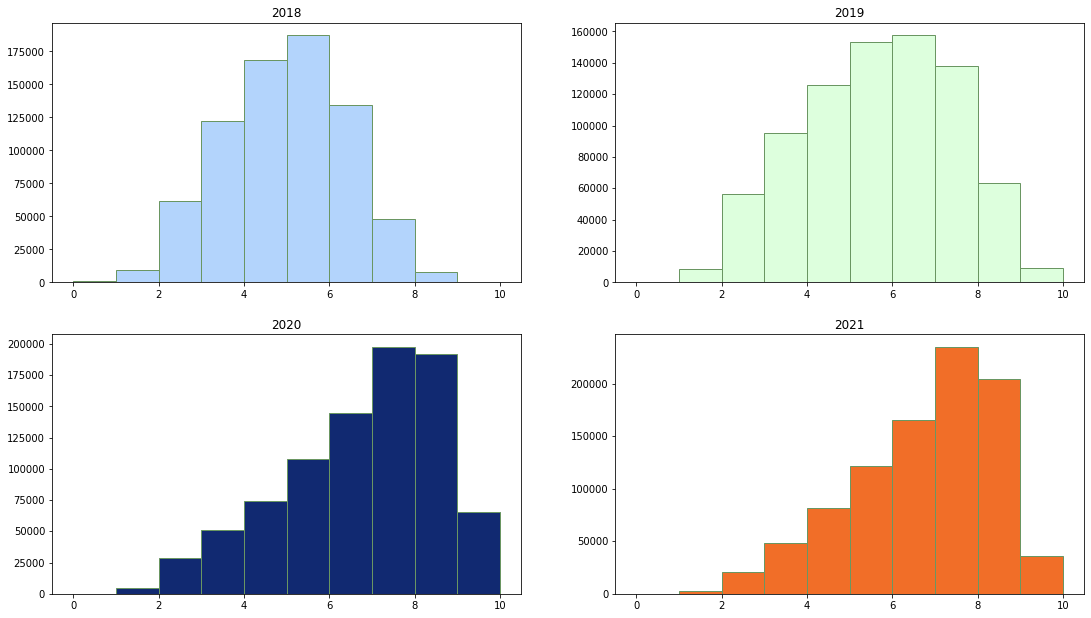

In [34]:
#Môn TOÁN

fig,a =  plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5, forward=True)

c = [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
       5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6,
       7.8, 8. , 8.2, 8.4, 8.6, 8.8, 9. , 9.2, 9.4, 9.6, 9.8,10.0]

a[0][0].hist(math_18,edgecolor="#6A9662",color="#B3D4FC")
a[0][0].set_title('2018')
a[0][1].hist(math_19,edgecolor="#6A9662",color="#DDFFDD")
a[0][1].set_title('2019')
a[1][0].hist(math_20,edgecolor="#6A9662",color="#112971")
a[1][0].set_title('2020')
a[1][1].hist(math_21,edgecolor="#6A9662",color="#F16E28")
a[1][1].set_title('2021')

In [35]:
df_results[df_results['Toan']==3.8]

,SBD,Toan,Van,Ngoai ngu,Ly,Sinh,Hoa,Lich su,Dia ly,GDCD,Year,MaTinh
847352,18010247,3.8,6.75,3.0,NaN,NaN,NaN,3.50,6.25,8.00,2018,18
847436,18019492,3.8,5.50,NaN,NaN,NaN,NaN,3.00,5.75,NaN,2018,18
847520,18009412,3.8,3.75,2.8,NaN,NaN,NaN,5.00,5.25,6.75,2018,18
847542,18009323,3.8,5.75,2.8,2.75,2.75,3.0,3.50,6.00,7.00,2018,18
847569,18018423,3.8,6.50,3.4,NaN,NaN,NaN,8.00,5.25,7.50,2018,18
...,...,...,...,...,...,...,...,...,...,...,...,...
4198820,64006547,3.8,NaN,NaN,3.50,NaN,3.5,NaN,NaN,NaN,2021,64
4198837,64006542,3.8,4.50,NaN,NaN,NaN,NaN,6.50,NaN,NaN,2021,64
4198944,64006483,3.8,5.00,NaN,NaN,NaN,NaN,6.25,6.75,NaN,2021,64
4198949,64006567,3.8,4.00,NaN,NaN,NaN,NaN,5.00,NaN,NaN,2021,64


Text(0.5, 1.0, '2021')

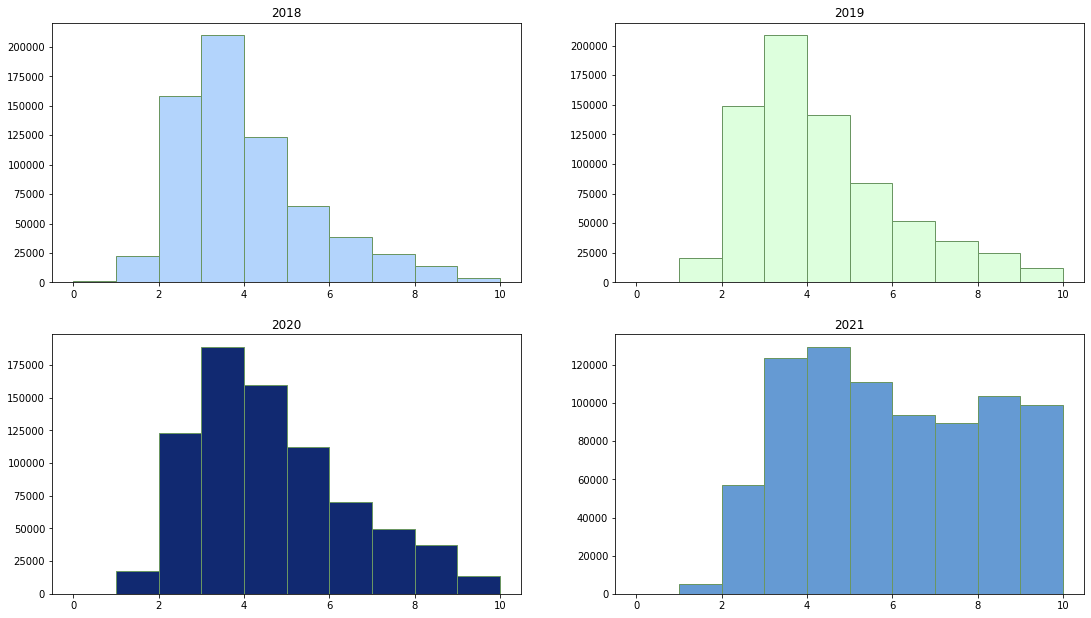

In [36]:
#Môn Ngoại ngữ

fig,a =  plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5, forward=True)
x = np.array(df_cities['MaTinh'])

x = np.arange(1,5)
a[0][0].hist(language_18,edgecolor="#6A9662",color="#B3D4FC")
a[0][0].set_title('2018')
a[0][1].hist(language_19,edgecolor="#6A9662",color="#DDFFDD")
a[0][1].set_title('2019')
a[1][0].hist(language_20,edgecolor="#6A9662",color="#112971")
a[1][0].set_title('2020')
a[1][1].hist(language_21,edgecolor="#6A9662",color="#659AD3")
a[1][1].set_title('2021')

### So sánh phổ điểm của môn Toán và Ngoại ngữ theo sự thay đổi từng năm theo đồ thị đã được trực quan
Liệu có thể nói như một số bài báo là Ngoại ngữ (cụ thể là tiếng Anh) hiện nay không được các bạn trẻ ưu tiên lấy đó để xét điểm vào đại học ??

**Trả lời**


ở các bài thi môn toán qua từng năm có sự thay đổi rõ rệt, vẫn là biểu đồ bị lệch về bên phải cho thấy điểm trung binh đạt được là khá cao và có xu hướng đang dần tăng lên, điều này có thể được giải thích theo 2 hướng tích cực và tiêu cực
- Tích cực là: Toán là một môn bắt buộc và tất cả các thí sinh tham gia luôn trong tâm thế đạt được điểm cao nhất có thể để dễ dàng hơn cho các ôn sau, nó cũng là tiền đề để học tốt các bộ môn về tự nhiên
- Tiêu cực là: Do vấn đề về dịch bênh cũng như việc xét tuyển ĐH đã không còn quá phụ thuộc vào điểm số của kì thi THPTQG nên đề có xu hướng dễ chịu hơn, nghiêng về hướng muốn học sinh được tốt nghiệp với điểm số cao và không quan tâm đến tình trạng *lạm phát điểm*

Bài thi Ngoại ngữ thì lại là đồ thị lệch về bên trái thể hiện việc điểm số không hề cao và phần nhiều là các trường họp dưới trung bình, có thể thấy qua các bài báo thường đăng về việc có >40% học sinh tham gia THPTQG có điểm số thấp. Tuy nhiên điểm liệt thấp cho thấy đề thi vẫn đảm bảo đủ điều kiện cho HS tốt nghiệp.
- Ở các năm trước, điểm số có phần rất thấp so với năm 2021, điều này được lí giải là do hiện tại xu hướng xét tuyển bằng điểm thi trong trường và các bằng Anh Văn Quốc tế là vô cùng phổ biến trong hiện tại, phải gọi là xu thế cho các bạn không muốn phải khó khăn trong việc ôn luyện nhiều môn mòa chỉ cần quan tâm vào bằng tiếng anh là được
- Ỏ năm 2021, điểm số tăng cao vượt trội hơn cả với môn toán
- Tỉnh trạng này còn có thể là do đề thi hiện tại được đánh giá là dễ hơn so với các năm trước và các môn thi tổ hợp (tự nhiên) trong cùng năm

# Còn tiếp ....
hãy trả lời giừm tớ đuy

**Câu hỏi 6**\
So sánh số lượng người thi tổ hợp Khoa học tự nhiên và Khoa học xã hội trong 4 năm
- KHTN: Lí Hóa Sinh
- KHXH: Sử Địa GDCD

Cho biết số lượng thí sinh tham dự bài thi tổ hợp **KHTN** hoặc **KHXH** là các học sinh tham gia thi tối thiểu 1 trong 3 môn của tổ hợp\
Vậy nên để tranh tình trạng có những bài thi làm ít hơn 3 bài thì mình sẽ *lấy số lượng của môn thi **cao nhất** trong cả 3 môn* và tính ra số lượng bài thi tổ hợp

In [37]:
science_subjects = ['Ly', 'Hoa', 'Sinh']
social_subjects = ['Lich su', 'Dia ly', 'GDCD']

In [38]:
count_science=0
for subject in science_subjects:
    if(df_results[subject].count() > count_science):
        count_science = df_results[subject].count()
count_science

1249962

In [39]:
count_social=0
for subject in social_subjects:
    if(df_results[subject].count() > count_social):
        count_social = df_results[subject].count()
count_social

2144812

In [40]:
count_science + count_social > df_results['SBD'].count()

True

**Kết luận**
=> Có nhiều trường hợp sinh viên thi cả 2 tổ hợp trong 4 năm

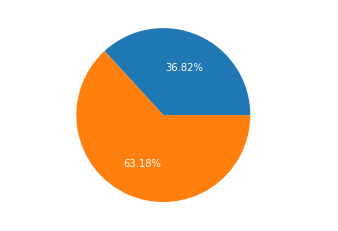

In [41]:
# fig = plt.figure()
labels = ['Tổ họp Khoa học Tự nhiên', 'Tổ hợp Khoa học Xã hội']
plt.pie([count_science,count_social], labels = labels,autopct='%1.2f%%', textprops={'color':"w"})
plt.show()

### Vẽ biểu đồ so sánh số lượng các bài thi tổ hợp trong mỗi năm

In [42]:
for year in years:
    count_science=0
    for subject in science_subjects:
        if(df_results[df_results['Year']==year].loc[:,subject].count() > count_science):
            count_science = df_results[subject].count()
    print(count_science)


# count_science=0
# for subject in science_subjects:
#     if(df_results[subject].count() > count_science):
#         count_science = df_results[subject].count()
# count_science

1239159
1239159
1239159
1239159


In [43]:
science_subjects

['Ly', 'Hoa', 'Sinh']

In [44]:
count_science=0
for subject in science_subjects:
    if(df_results[df_results['Year']==2020].loc[:,subject].count() > count_science):
        print(df_results[df_results['Year']==2020].loc[:,subject].count())
        # count_science = df_results[subject].count()
# print(count_science)

293287
295536
290377


**Câu hỏi 7**\
So sánh số lượng các bài thi tổ hợp và xem Tổ hợp nào hiện đang là xu thế và có điểm số lấn át với những tổ hợp khác

**cụ thể**\
Dưới đây chúng ta chỉ xét những tổ hợp đơn giản
- A00 : Toán - Lý - Hóa
- A01 : Toán - Lý - Anh
- B00 : Toán - Hóa -Sinh
- C00 : Ngữ Văn - Địa lý - Lịch sử
- D07 : Ngữ Văn - Ngoại ngữ - Hóa học